# Some IMDb Insights
This code was made to prepare some insights of the IMDb dataset by genres.
## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import time
import BubbleChart

importing Jupyter notebook from BubbleChart.ipynb


## Reading the data

In [2]:
start_time = time.time()
title = pd.read_csv('rodri_title_final_inner.tsv', sep='\t',low_memory=False)
print("--- %s seconds ---" % (time.time() - start_time))
print(len(title))


--- 12.699965000152588 seconds ---
3075473


Deleting "Adult" and genres without values

In [3]:
print(len(title))
title = title[(title.genres != "\\N")]
print(len(title))
title = title[(title.genres != "Adult")]
print(len(title))

3075473
3029754
3029647


## Genres Insights by Frequencies

In this part decribes how frequent is a genre and is plotted as a bar plot and as a BubbleChart

### Counting all genres (unique and mixed)
As it can be seen here, one first look at the genres frequencies can tell us that there are a lot of genres.

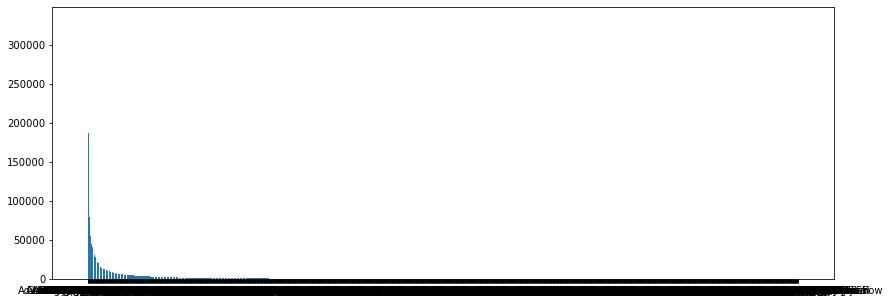

In [27]:
count = pd.DataFrame(title["genres"].value_counts());count

height = count["genres"].values
bars = count["genres"].keys()
y_pos = np.arange(len(count))

plt.rcParams['figure.figsize'] = [14, 5]

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

### Making an only genres dataframe to count their frequencies
But if we make a further view of what genres the dataset composed of, we see that most of the genres are combination of more than one.

In [4]:
genres = pd.DataFrame(title["genres"]) # == title.genres
count = pd.DataFrame(title["genres"].value_counts());count

,genres
Drama,331981
Comedy,187182
Documentary,156901
"Drama,Romance",86870
"Comedy,Drama",78881
...,...
"Horror,Musical,Romance",1
"Documentary,Romance,Sci-Fi",1
"Action,Reality-TV,War",1
"Adventure,Comedy,News",1



So, if we want to make the insights of each genre itself, we need to count how many times the genre appears.
They can be counted from the genres dataframe we created before or from the title dataframe.
## Counting frequencies from the genres dataframe

In [5]:
genres_frequency = {}
for i in genres.values:
    film_genres = i[0].split(",")
    for item in film_genres:
        if item in genres_frequency:
            # incrementing the counr
            genres_frequency[item] += 1
        else:
            # initializing the count
            genres_frequency[item] = 1

In [6]:
genres_frequency

{'Documentary': 312177,
 'Short': 351225,
 'Animation': 217634,
 'Comedy': 832575,
 'Romance': 349092,
 'Sport': 46874,
 'News': 9868,
 'Drama': 1338571,
 'Fantasy': 144364,
 'Horror': 224381,
 'Biography': 100616,
 'Music': 84670,
 'War': 71150,
 'Crime': 332246,
 'Western': 59133,
 'Family': 179679,
 'Adventure': 318574,
 'Action': 408556,
 'History': 96947,
 'Mystery': 159786,
 'Sci-Fi': 116407,
 'Musical': 52137,
 'Thriller': 271966,
 'Film-Noir': 14871,
 'Game-Show': 10967,
 'Talk-Show': 12104,
 'Reality-TV': 32006,
 'Adult': 297}

## Counting frequencies from the titles dataframe

In [7]:
genres_frequency = {}
for i in title.genres.values:
    film_genres = i.split(",")
    for item in film_genres:
        if item in genres_frequency:
            # incrementing the counr
            genres_frequency[item] += 1
        else:
            # initializing the count
            genres_frequency[item] = 1

In [8]:
genres_frequency

{'Documentary': 312177,
 'Short': 351225,
 'Animation': 217634,
 'Comedy': 832575,
 'Romance': 349092,
 'Sport': 46874,
 'News': 9868,
 'Drama': 1338571,
 'Fantasy': 144364,
 'Horror': 224381,
 'Biography': 100616,
 'Music': 84670,
 'War': 71150,
 'Crime': 332246,
 'Western': 59133,
 'Family': 179679,
 'Adventure': 318574,
 'Action': 408556,
 'History': 96947,
 'Mystery': 159786,
 'Sci-Fi': 116407,
 'Musical': 52137,
 'Thriller': 271966,
 'Film-Noir': 14871,
 'Game-Show': 10967,
 'Talk-Show': 12104,
 'Reality-TV': 32006,
 'Adult': 297}

As dict has not .to_csv attribute, we first need to save it in a dataframe if we want to save it.

In [10]:
genres_frequency_Series = pd.Series()
genres_frequency_Series["data"] = list(genres_frequency.values())
genres_frequency_Series["labels"] = list(genres_frequency.keys())
genres_frequency_Series.to_csv('genres_frequency_Series.csv',sep=",")
genres_frequency_Series

/var/folders/bk/y0g661w92fl2j_dxj20n5bch0000gn/T/ipykernel_21753/2008886426.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres_frequency_Series = pd.Series()


data      [312177, 351225, 217634, 832575, 349092, 46874...
labels    [Documentary, Short, Animation, Comedy, Romanc...
dtype: object

## Ploting genres Frequency data
We now can represent the data in the different plots we mention before.

### In a bar plot

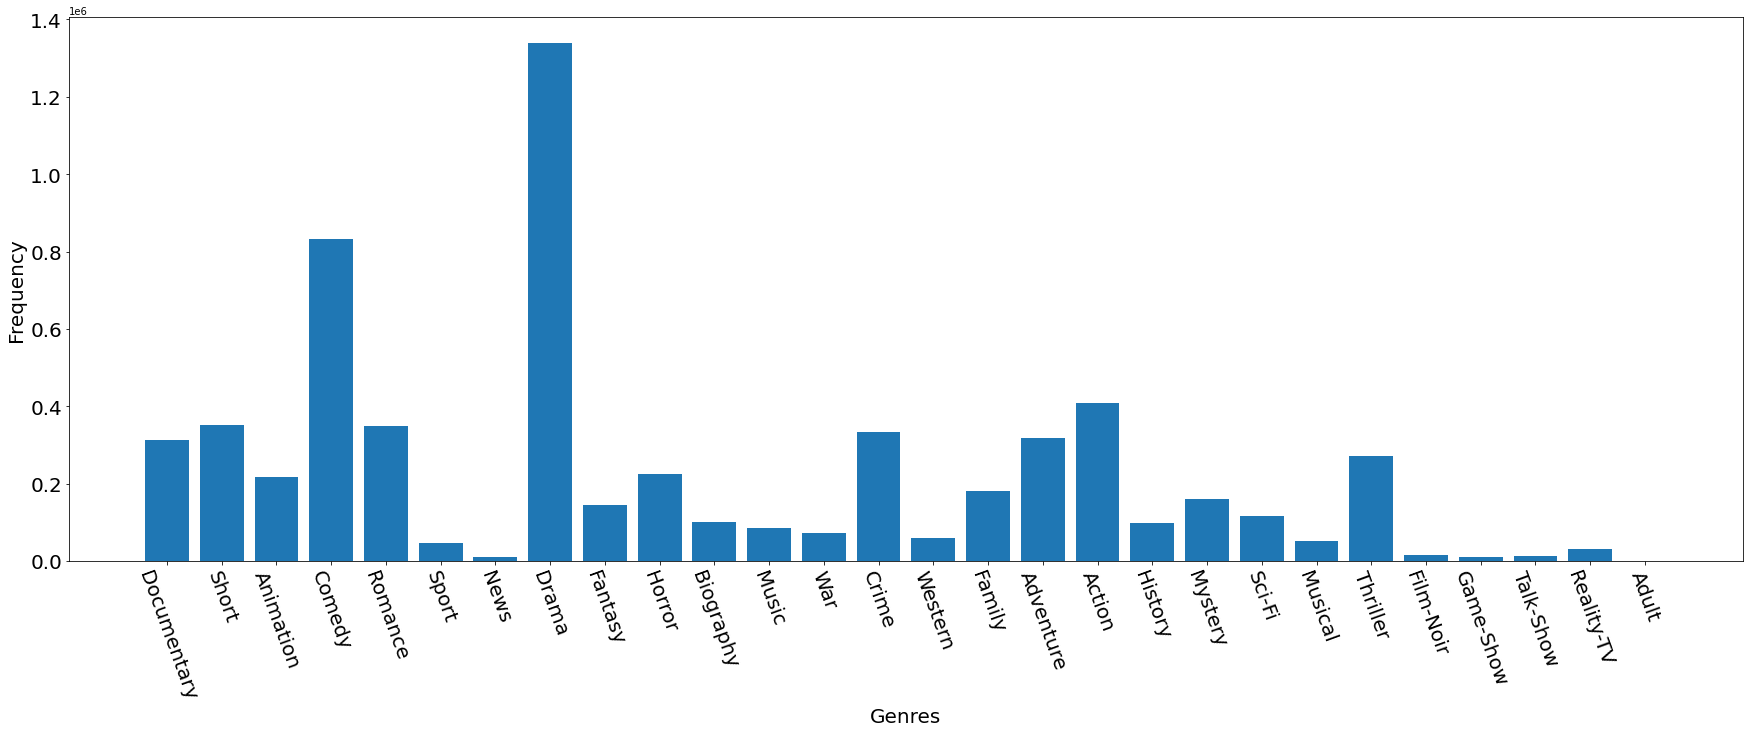

In [47]:
# Graph data
height = list(genres_frequency.values())
bars = list(genres_frequency.keys())
y_pos = np.arange(len(genres_frequency))

# Img size
plt.rcParams['figure.figsize'] = [30, 10]

#Create labels
plt.xlabel('Genres',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xticks(fontsize=20, rotation=290)
plt.yticks(fontsize=20)

# Show graphic
plt.show()

### In a packed bubble chart

In [17]:
data = {
    'bigrams': list(genres_frequency.keys()), # It is needed to parse the information to a list

    'frequency': list(genres_frequency.values()),

    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral','#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825'] # Different colours we had
}

In [18]:
class BubbleChart:
    import numpy as np
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [19]:
bubble_chart = BubbleChart(area=data['frequency'],
                           bubble_spacing=2)
bubble_chart.collapse()


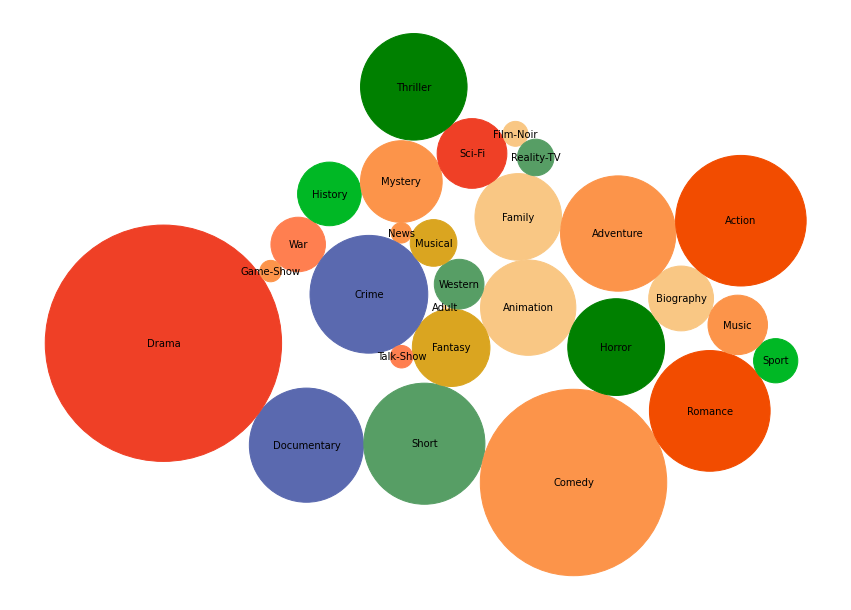

In [20]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(15, 15, forward=True)
bubble_chart.plot(
    ax, data['bigrams'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()

# Average Genres' ratings
For this part average genres's ratings wanted to be represented in a barplot.

In [22]:
title2 = title.reset_index();title2 # Reset the index because of missing values removed before.
title2.numVotes[1]

1879

This code is similar to the genres' frequency, it saves the rating that the genre has in each row that it appears.

In [24]:
start_time = time.time()
genres_ratings = pd.Series()
for i in np.arange(len(title2)):
    film_genres = title2.loc[i].genres.split(",")
    for item in film_genres:
        if item in genres_ratings:
            genres_ratings[item].append(title2["averageRating"][i])
        elif item not in genres_ratings:
            genres_ratings[item] = [title2["averageRating"][i]]
        else:
            print("error")
print("--- %s seconds ---" % (time.time() - start_time))

genres_ratings

/var/folders/bk/y0g661w92fl2j_dxj20n5bch0000gn/T/ipykernel_21753/2206451227.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres_ratings = pd.Series()


--- 357.8768117427826 seconds ---


Documentary    [5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.4, ...
Short          [5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.9, ...
Animation      [5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 6.5, ...
Comedy         [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, ...
Romance        [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, ...
Sport          [5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, ...
News           [4.3, 4.3, 4.3, 4.3, 4.3, 4.2, 4.2, 4.7, 4.7, ...
Drama          [4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, ...
Fantasy        [5.6, 5.6, 5.6, 4.5, 4.5, 4.5, 4.4, 4.4, 4.4, ...
Horror         [6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, ...
Biography      [5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, ...
Music          [4.7, 4.7, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, ...
War            [4.9, 4.9, 4.2, 4.2, 4.4, 4.4, 4.6, 4.6, 4.6, ...
Crime          [4.6, 4.6, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, ...
Western        [4.9, 4.9, 4.9, 6.3, 6.3, 6.6, 6.6, 6.9, 6.9, ...
Family         [5.2, 5.2,

This next piece of code tried to make a weighted arithmetic mean of the genres based on a normalization of the numer of votes.

This can save the results if its needed

In [25]:
genres_ratings.to_csv("genres_ratings.csv")

### Mean and sort
Mean was applied to each genre to get the average rating. Then they have been sorted to have them in order.

In [26]:
mean_genres_ratings = {}
for i in np.arange(len(genres_ratings)):
    mean_genres_ratings[genres_ratings.keys()[i]] = round(np.mean(genres_ratings[i]),2)
mean_genres_ratings_sorted = dict(sorted(mean_genres_ratings.items(), key=lambda item: item[1],reverse=True))

Saving the data in a csv

In [302]:
print(list(mean_genres_ratings_sorted.values()))
print(list(mean_genres_ratings_sorted.keys()))
mean_genres_ratings_Series = pd.Series()
mean_genres_ratings_Series["labels"] = list(mean_genres_ratings_sorted.keys())
mean_genres_ratings_Series["data"] = list(mean_genres_ratings_sorted.values())
mean_genres_ratings_Series.to_csv("mean_genres_ratings_Series.csv")
mean_genres_ratings_Series

[7.09, 6.93, 6.92, 6.84, 6.8, 6.73, 6.67, 6.64, 6.61, 6.5, 6.43, 6.38, 6.35, 6.35, 6.33, 6.33, 6.33, 6.31, 6.29, 6.28, 6.27, 6.19, 6.11, 6.08, 5.89, 5.83, 5.62, 5.45]
['Documentary', 'Biography', 'History', 'Music', 'Film-Noir', 'Short', 'Animation', 'Sport', 'War', 'Drama', 'Family', 'Musical', 'Romance', 'Crime', 'News', 'Fantasy', 'Talk-Show', 'Mystery', 'Adventure', 'Comedy', 'Reality-TV', 'Game-Show', 'Western', 'Action', 'Sci-Fi', 'Thriller', 'Adult', 'Horror']


/var/folders/bk/y0g661w92fl2j_dxj20n5bch0000gn/T/ipykernel_9582/3822409924.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mean_genres_ratings_Series = pd.Series()


labels    [Documentary, Biography, History, Music, Film-...
data      [7.09, 6.93, 6.92, 6.84, 6.8, 6.73, 6.67, 6.64...
dtype: object

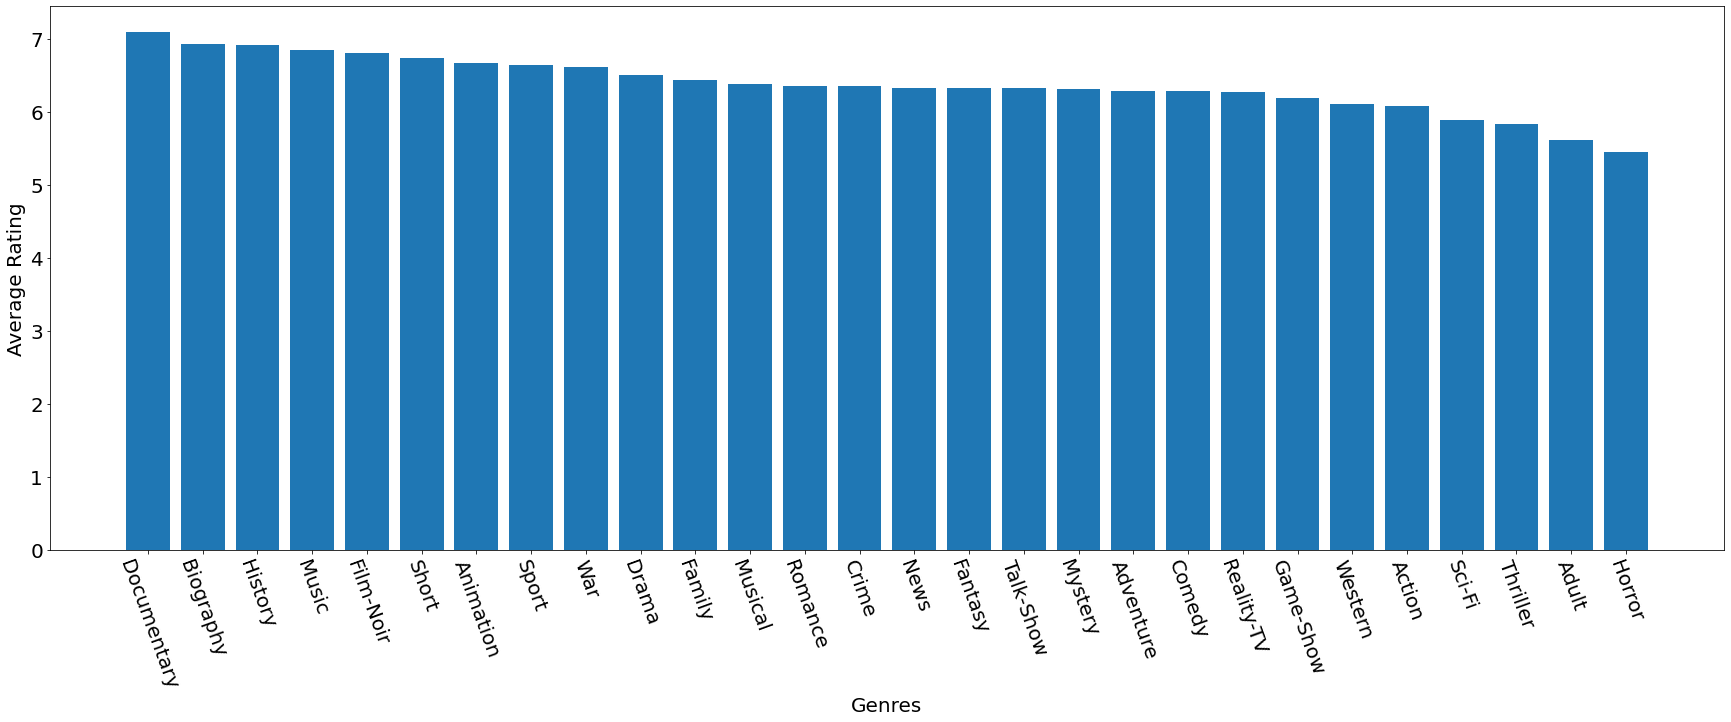

In [48]:
# Graph data
height = list(mean_genres_ratings_sorted.values())
bars = list(mean_genres_ratings_sorted.keys())
y_pos = np.arange(len(mean_genres_ratings_sorted))

# Img size
plt.rcParams['figure.figsize'] = [30, 10]

# Create labels
plt.xlabel('Genres',fontsize=20)
plt.ylabel('Average Rating',fontsize=20)

# Create bars
plt.bar(y_pos, height)

# Create names and values on the x-axis and y-axis
plt.xticks(y_pos, bars)
plt.xticks(fontsize=20, rotation=290)
plt.yticks(fontsize=20)

# Show graphic
plt.show()

